<a href="https://colab.research.google.com/github/Chan3377/llm-detect-ai-generated-text/blob/main/llm_detect_ai_generated_text_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LLM - Detect AI Generated Text**

The goal of the project is to work with the data by training the model to detect wheter the essay was written by
* Student (0) - Human Generated Text
* Generated by LLM (1) - AI Generated Text

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import joblib

## **Load dataset**

In [ ]:
file_path = "/content/drive/MyDrive/dataset/train_essays_7_prompts.csv"
data = pd.read_csv(file_path, dtype=str)
df = data.copy()
df.head()

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
df.tail()

,text,label
14872,Cars are one of the most important and common ...,1
14873,"In today's world, cell phones are ubiquitous a...",1
14874,"In ""The Challenge of Exploring Venus,"" the aut...",1
14875,"The article ""Making Mona Lisa Smile"" discusses...",1
14876,Passage 1:\n\nCars are one of the main ways in...,1


The essay was written by a student (0), generated by LLM (1)

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.shape

(14877, 2)

In [ ]:
df['label'].value_counts()

0    13712
1     1165
Name: label, dtype: int64

Define label column in the data for analysis

In [ ]:
human_generated_text = df[df['label'] == "0"]
ai_generated_text = df[df['label'] == "1"]

In [ ]:
human_generated_text.shape, ai_generated_text.shape

((13712, 2), (1165, 2))

## **Balance dataset**

Under-sampling the data to balance with ai_generated_text --> 1165

In [ ]:
human_generated_text_sample = human_generated_text.sample(n=1165)

Concatenating the dataframe

In [ ]:
new_df = pd.concat([human_generated_text_sample, ai_generated_text], axis=0)

In [ ]:
new_df

,text,label
6862,'Space. The final frontier.' This is a very co...,0
12685,Now the fact is that the electoral college wor...,0
2795,Why Drivers Should or Should Not Use Cell Phon...,0
5507,I believe that we should study and explore Ven...,0
8525,The techology called the Facial Action Coding ...,0
...,...,...
14872,Cars are one of the most important and common ...,1
14873,"In today's world, cell phones are ubiquitous a...",1
14874,"In ""The Challenge of Exploring Venus,"" the aut...",1
14875,"The article ""Making Mona Lisa Smile"" discusses...",1


In [ ]:
new_df['label'].value_counts()

0    1165
1    1165
Name: label, dtype: int64

## **Train Test Split**

Splitting the data to feature Input and Target

In [ ]:
input = new_df['text']
target = new_df['label']

In [ ]:
input, target

(6862     'Space. The final frontier.' This is a very co...
 12685    Now the fact is that the electoral college wor...
 2795     Why Drivers Should or Should Not Use Cell Phon...
 5507     I believe that we should study and explore Ven...
 8525     The techology called the Facial Action Coding ...
                                ...                        
 14872    Cars are one of the most important and common ...
 14873    In today's world, cell phones are ubiquitous a...
 14874    In "The Challenge of Exploring Venus," the aut...
 14875    The article "Making Mona Lisa Smile" discusses...
 14876    Passage 1:\n\nCars are one of the main ways in...
 Name: text, Length: 2330, dtype: object,
 6862     0
 12685    0
 2795     0
 5507     0
 8525     0
         ..
 14872    1
 14873    1
 14874    1
 14875    1
 14876    1
 Name: label, Length: 2330, dtype: object)

Split the data into Training data and Testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, stratify=target, random_state=2)

In [ ]:
print(input.shape, x_train.shape, x_test.shape)
print(target.shape, y_train.shape, y_test.shape)

(2330,) (1864,) (466,)
(2330,) (1864,) (466,)


In [ ]:
x_test[:1], y_test[:1]

(1999    Dear Senator,\n\nI am writing to express my op...
 Name: text, dtype: object,
 1999    1
 Name: label, dtype: object)

In [ ]:
y_train.value_counts()

0    932
1    932
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

1    233
0    233
Name: label, dtype: int64

## **Tokenize datasest**

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_tk = vectorizer.fit_transform(x_train)
x_test_tk = vectorizer.transform(x_test)

In [ ]:
# check what inside x_train_tk
x_train_tk.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_tk.shape

(1864, 15383)

In [ ]:
x_test_tk.shape

(466, 15383)

## **Model Training & Evaluation**

### **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train_tk, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Accuracy on test data
y_test_pred = log_reg.predict(x_test_tk)
test_data_accuracy = accuracy_score(y_test_pred, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9957081545064378


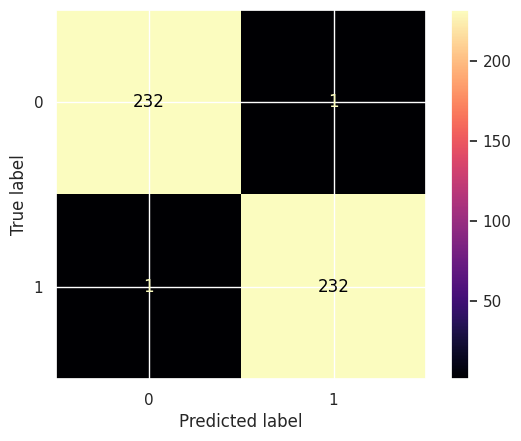

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = log_reg.classes_,
    cmap = 'magma'
)

#### Save and load the model

In [ ]:
# save the model to disk
filename = "log_reg_trained_model.sav"
joblib.dump(log_reg, filename)

['log_reg_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9957081545064378


### **MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(x_train_tk, y_train)

MultinomialNB()

In [ ]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
# Accuracy on test data
y_test_pred_clf = clf.predict(x_test_tk)
test_data_accuracy_clf = accuracy_score(y_test_pred_clf, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_clf)

Accuracy on Test data :  0.9012875536480687


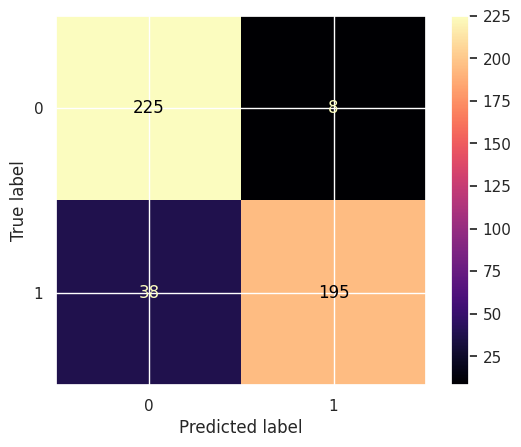

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_clf,
    labels = clf.classes_,
    cmap = 'magma'
)

In [ ]:
print(classification_report(y_test, y_test_pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       233
           1       0.96      0.84      0.89       233

    accuracy                           0.90       466
   macro avg       0.91      0.90      0.90       466
weighted avg       0.91      0.90      0.90       466



#### Save and load the model

In [ ]:
# save the model to disk
filename = "clf_trained_model.sav"
joblib.dump(clf, filename)

['clf_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9012875536480687


### **ComplementNB**

In [ ]:
cpm = ComplementNB()

In [ ]:
cpm.fit(x_train_tk, y_train)

ComplementNB()

In [ ]:
cpm.get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'norm': False}

In [ ]:
# Accuracy on test data
y_test_pred_cpm = cpm.predict(x_test_tk)
test_data_accuracy_cpm = accuracy_score(y_test_pred_cpm, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_cpm)

Accuracy on Test data :  0.9012875536480687


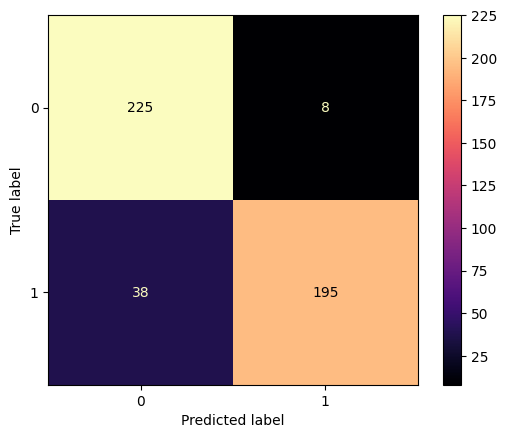

In [ ]:
sns.reset_orig() # remove white line

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_cpm,
    labels = cpm.classes_,
    cmap = 'magma'
)

In [ ]:
print(classification_report(y_test, y_test_pred_cpm, target_names = ["Human", "AI"]))

              precision    recall  f1-score   support

       Human       0.86      0.97      0.91       233
          AI       0.96      0.84      0.89       233

    accuracy                           0.90       466
   macro avg       0.91      0.90      0.90       466
weighted avg       0.91      0.90      0.90       466



#### Save and load the model

In [ ]:
# save the model to disk
filename = "cpm_trained_model.sav"
joblib.dump(cpm, filename)

['cpm_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9012875536480687


### **KNeighborsClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters_knn = {'n_neighbors':range(1, 21),
                  'weights':['uniform', 'distance']}

In [ ]:
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid = parameters_knn,
                               scoring = 'accuracy')

In [ ]:
grid_search_knn.fit(x_train_tk, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_clf = grid_search_knn.best_estimator_
knn_clf

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_test_pred_knn = knn_clf.predict(x_test_tk)
test_data_accuracy_knn = accuracy_score(y_test_pred_knn, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_knn)

Accuracy on Test data :  0.944206008583691


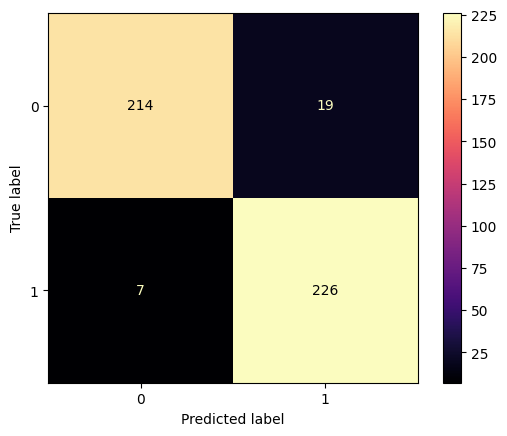

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_knn,
    labels = knn_clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       233
           1       0.92      0.97      0.95       233

    accuracy                           0.94       466
   macro avg       0.95      0.94      0.94       466
weighted avg       0.95      0.94      0.94       466



#### Save and load the model

In [ ]:
# save the model to disk
filename = "knn_clf_trained_model.sav"
joblib.dump(knn_clf, filename)

['knn_clf_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.944206008583691


### **Support Vector Machines**

In [ ]:
from sklearn.preprocessing import  MaxAbsScaler, MinMaxScaler
from sklearn.svm import SVC

In [ ]:
# MaxAbsScaler doesn’t reduce the effect of outliers; it only linearly scales them down
# This scaler can also be applied to sparse CSR or CSC matrices

scaling = MaxAbsScaler()

In [ ]:
x_train_svc = scaling.fit_transform(x_train_tk)
x_test_svc = scaling.transform(x_test_tk)

In [ ]:
x_train_svc.dtype, x_test_svc.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
parameters_svc = {'kernel':['linear', 'poly', 'rbf'],
                  'C':range(1, 11),
                  'gamma': ['scale', 'auto']}

In [ ]:
grid_search_svc = GridSearchCV(estimator = SVC(),
                               param_grid = parameters_svc,
                               scoring = 'accuracy')

In [ ]:
grid_search_svc.fit(x_train_svc, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
svc_clf = grid_search_svc.best_estimator_
svc_clf

SVC(C=1, kernel='linear')

In [ ]:
y_test_pred_svc = svc_clf.predict(x_test_svc)
test_data_accuracy_svc = accuracy_score(y_test_pred_svc, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_svc)

Accuracy on Test data :  1.0


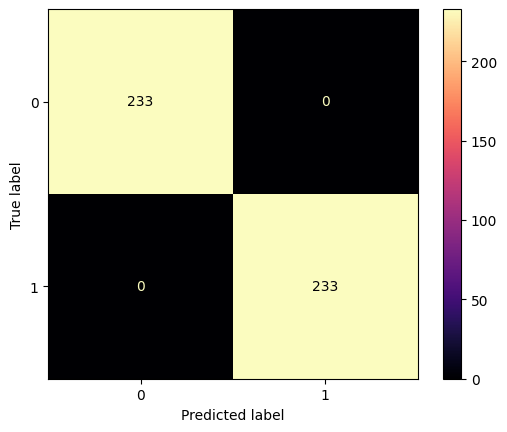

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_svc,
    labels = svc_clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       233

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



#### Save and load the model

In [ ]:
# save the model to disk
filename = "svc_clf_trained_model.sav"
joblib.dump(svc_clf, filename)

['svc_clf_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_svc, y_test)
print(result)

1.0


### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(ccp_alpha = 0.0001)

In [ ]:
rf_clf.fit(x_train_tk, y_train)

RandomForestClassifier(ccp_alpha=0.0001)

In [ ]:
y_test_pred_rf = rf_clf.predict(x_test_tk)
test_data_accuracy_rf = accuracy_score(y_test_pred_rf, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_rf)

Accuracy on Test data :  0.9699570815450643


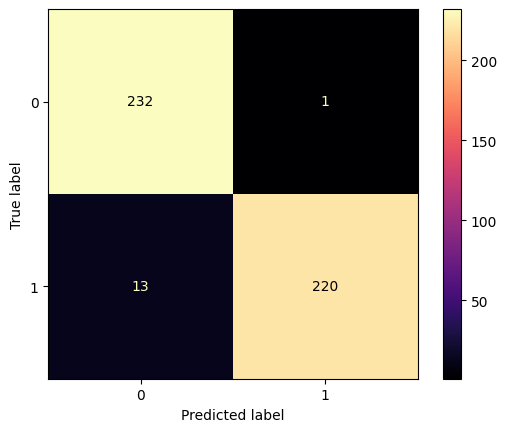

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_rf,
    labels = rf_clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred_rf, target_names = ["Human", "AI"]))

              precision    recall  f1-score   support

       Human       0.95      1.00      0.97       233
          AI       1.00      0.94      0.97       233

    accuracy                           0.97       466
   macro avg       0.97      0.97      0.97       466
weighted avg       0.97      0.97      0.97       466



#### Save and load the model

In [ ]:
print(f"Shape of x_train_tk: {x_train_tk.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train_tk: (1864, 15383)
Shape of y_test: (466,)


In [ ]:
# save the model to disk
filename = "rf_clf_trained_model.sav"
joblib.dump(rf_clf, filename)

['rf_clf_trained_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load("rf_clf_trained_model.sav")
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9699570815450643


## **Model Inference**

In [ ]:
# vectorizer = CountVectorizer()

In [ ]:
print(type(x_test))

<class 'pandas.core.series.Series'>


In [ ]:
x_test_tk[1:16].toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
hm_text = ["It's said be staying with you for three months later this year",
        "I know how to speak english",
        "This is an amazing song", ]

In [ ]:
ai_text = ["There are several tools available for generating random text. These tools can be used for various purposes such as creating sample web pages, typography samples, or overcoming writer's block",
           "Random Paragraph Generator: A free online tool to generate random paragraphs, which can be used by writers to overcome creative blocks or incorporate random paragraphs into their writing"]

In [ ]:
chat_gpt = ["The sun, a glowing orb of fiery brilliance, gradually descended beneath the distant horizon, casting its warm farewell across the expanse of the sky, which transformed into a mesmerizing canvas of soft pastel shades—rosy pinks blending seamlessly with golden oranges, creating a breathtaking display of nature's artistry.",
            "Inside the cozy confines of the kitchen, the air was filled with the irresistible scent of bread, freshly baked and still warm from the oven, its golden crust emitting a tantalizing aroma that enveloped the room, beckoning all who passed by to pause and indulge in its comforting allure.",
            "Amidst the cheerful chatter and joyful laughter, friends gathered around the crackling fireplace, their faces illuminated by its flickering flames as they shared stories of days gone by, each anecdote met with nostalgic smiles and heartfelt laughter, creating an atmosphere of warmth and camaraderie that was simply infectious.",
            "Beyond the confines of my window, the gentle sway of branches whispered a soothing lullaby, their rustling leaves dancing in harmony with the soft caress of the afternoon breeze, creating a tranquil symphony that enveloped me in a cocoon of peaceful serenity, lulling me into a restful slumber.",
            "Standing in the wings, her heart pounded with nervous excitement, yet her gaze remained steady, her resolve unwavering as she took a deep breath, drawing upon her inner strength and courage." "With each step onto the stage, she embraced the spotlight, ready to captivate the audience with her passion and talent."]

In [ ]:
hm_text_tk = vectorizer.transform(hm_text)
ai_text_tk = vectorizer.transform(ai_text)
cg_text_tk = vectorizer.transform(chat_gpt)

#### Load the model

In [ ]:
# load the model from disk
loaded_model = joblib.load('clf_trained_model.sav')
hm_test_pred = loaded_model.predict(hm_text_tk)
ai_test_pred = loaded_model.predict(ai_text_tk)
cg_test_pred = loaded_model.predict(cg_text_tk)
hm_test_pred, ai_test_pred, cg_test_pred

(array(['0', '0', '0'], dtype='<U1'),
 array(['0', '1'], dtype='<U1'),
 array(['1', '0', '0', '1', '0'], dtype='<U1'))